# **Анализ репозиториев в GitHub**

## 1. Введение
### 1.1 Цель исследования
Собрать данные о популярных GitHub-репозиториях по тегам AI и ML с помощью веб-парсинга результатов глобального поиска GitHub, провести очистку данных, создание новых признаков и исследовательский анализ, чтобы выявить закономерности популярности open-source проектов.

### 1.2 Источник данных

Мы выполняем парсинг HTML-страниц глобального поиска GitHub:

Глобальный поиск по тегу AI:
https://github.com/search?q=AI&type=repositories&s=stars&o=desc

Глобальный поиск по тегу ML:
https://github.com/search?q=ML&type=repositories&s=stars&o=desc

### 1.3 Описание предметной области

GitHub — крупнейшая платформа для open-source разработки.
Мы анализируем репозитории, отсортированные по популярности (метрика: количество звёзд, сортировка Most stars → по убыванию).
Это позволяет выявлять факторы, связанные с востребованностью проектов в области AI/ML.

---
### 1.4 Требования и результат

| Требование                             | Результат |
|:--------------------------------------:|:-----------------------------:|
| Количество наблюдений  > 1000          | 1953                         |
| Начальное количество признаков >= 8-10 | 10                            |
| Типы признаков                         | числовые (stars, forks, activity), категориальные (язык), даты (created/updated), бинарные (flags по стеку) |
| Количество новых признаков >= 2        | 10                           |
| Финальное количество признаков         | 21                            |
| Визуализации >= 3                      | 6                             |
| Итоговый формат                        | Jupyter/Colab notebook + .CSV |
| [дополнительно] Репозиторий на github  | ссылка                        |


### 1.5 Технологии проекта

| Технология          | Документация                                       |
| :------------------ | :------------------------------------------------: |
| Python 3.12.12      | https://docs.python.org/3/                         |
| pandas              | https://pandas.pydata.org/docs/                    |
| NumPy               | https://numpy.org/doc/                             |
| requests            | https://requests.readthedocs.io/                   |
| BeautifulSoup (bs4) | https://beautiful-soup-4.readthedocs.io/en/latest/ |
| time (stdlib)       | https://docs.python.org/3/library/time.html        |
| random (stdlib)     | https://docs.python.org/3/library/random.html      |
| itertools (stdlib)  | https://docs.python.org/3/library/itertools.html   |
| pathlib (stdlib)    | https://docs.python.org/3/library/pathlib.html     |
| types.NoneType      | https://docs.python.org/3/library/types.html       |


### 1.6 Команда и распределение задач

| Участник                         | Обязанности                         |
|----------------------------------|-------------------------------------|
| **Трофимов Матвей Владимирович** | Выбор первичных признаков, сбор и парсинг, первичные выводы     |
| **Самунджян Дина Арменаковна**   | Очистка данных, пропуски, дубликаты, нормализация типов |
| **Серенко Елена Валерьевна**     | Создание новых признаков, промежуточные выводы по сформированному датасету            |
| **Пащенко Дмитрий Игоревич**     | Визуализации, промежуточные выводы по анализу и результаты   |

### Структура ноутбука

```markdown
# 1. Введение
## 1.1 Цель проекта
## 1.2 Источник данных
## 1.3 Описание предметной области
## 1.4 Требования к датасету
## 1.5 Технологии проекта
## 1.6 Команда и распределение задач

Трофимов Матвей Владимирович
### 2. Этап 0 — Сбор и парсинг данных
2.1 Загрузка библиотек и модулей для проекта
2.2 Вспомогательные функции парсинга GitHub
2.3 Сбор репозиториев (AI и ML) и объединение
2.4 Набор полученных после парсинга признаков
2.5 Парсинг. Промежуточные выводы

Самунджян Дина Арменаковна
### 3. Этап 1 — Очистка данных
3.1 Общий обзор датасета (shape, info, describe)
3.2 Обработка пропусков и заполнение описаний
3.3 Удаление дубликатов
3.4 Преобразование Programming languages и флага languages_missing
3.5 Очистка от выбросов по нескольким метрикам
3.6 Очистка. Промежуточные выводы

Серенко Елена Валерьевна
### 4. Этап 2 — Создание новых признаков
4.1 Генерация временных меток Created и Last updated
4.2 Подробное описание исходных столбцов
4.3 Расчёт новых метрик вовлечённости и стека
4.4 Блок разведочного анализа по активности сообществ
4.5 Словарь новых признаков
4.6 Обогащение. Промежуточные выводы

Пащенко Дмитрий Игоревич
### 5. Этап 3 — Анализ данных (EDA) и визуализация
5.1 Описательная статистика по числовым метрикам
5.2 Популярность языков
5.3 Средние звёзды по стэку
5.4 План визуализаций
5.5 Барплот топ-10 языков
5.6 Распределения звёзд/форков по топ-5 языкам
5.7 Scatter Stars–Forks в лог-шкале
5.8 Коррелограмма ключевых метрик
5.9 Трендлайны влияния контрибьюторов и PR на звёзды
5.10 Промежуточные выводы по EDA

### 6. Итоговые выводы исследования
```


# Этап 0 — Сбор и парсинг данных

In [156]:
"""
Переключатель окружения для работы локально или в Google Colab.
Устанавливайте USE_COLAB = True при запуске ноутбука в Colab.
"""
from pathlib import Path

USE_COLAB = True  # переключите на True для Google Colab (это работает при условии, если у вас есть доступ к общей папке)

if USE_COLAB:
    from google.colab import drive
    drive.mount("/content/drive")
    DATA_DIR = Path("/content/drive/MyDrive/Colab Notebooks") # Тут указана наша папка, если у вас другая, можете изменить путь
else:
    DATA_DIR = Path("укажите адрес вашей локальной папки, куда будут сохраняться результаты парсинга и новые датасеты")

print(f"Директория данных: {DATA_DIR.resolve()}")

# Далее в коде пути заменены на переменную DATA_DIR для удобства

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Директория данных: /content/drive/MyDrive/Colab Notebooks


## 2.1 Загрузка библиотек и модулей для проекта

In [157]:
import sys
import requests
import time
import pandas as pd
import random
import bs4
from bs4 import BeautifulSoup
import itertools
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

NoneType = type(None)

print("Python:", sys.version.split()[0])
print("requests:", requests.__version__)
print("pandas:", pd.__version__)
print("bs4:", bs4.__version__)
print("numpy:", np.__version__)
print("sns:", sns.__version__)
print("matplotlib:", matplotlib.__version__)

Python: 3.12.12
requests: 2.32.4
pandas: 2.2.2
bs4: 4.13.5
numpy: 2.0.2
sns: 0.13.2
matplotlib: 3.10.0


### 2.2 Функции для парсинга GitHub

**`repository_parsing(url)`**  
Функция принимает URL репозитория GitHub и с помощью HTTP‑запроса и библиотеки BeautifulSoup извлекает его параметры: название, описание, языки программирования, количество форков, звезд, коммитов, пул‑реквестов, контрибьюторов и релизов. При ошибке парсинга или отсутствии нужных элементов возвращает `None`, чтобы проблемные репозитории можно было безопасно пропустить при массовом сборе данных.

**`get_df_from_github(repositories_count)`**  
Функция выполняет массовый сбор данных о репозиториях по запросу `AI` и `ML` в поиске GitHub, обходя до 100 страниц выдачи с паузами между запросами. Для каждой найденной ссылки вызывается `repository_parsing`, а собранные параметры добавляются в списки до достижения заданного количества репозиториев `repositories_count`, после чего формируется `pandas.DataFrame` с основными метриками и ссылками на репозитории.

Смотрите подробности ниже в комментариях к коду.

In [158]:
# Получаем на вход ссылку на репозиторий в GitHub и парсим содержимое
def repository_parsing(url):
    try:
        print(f'Парсим репозиторий: {url}')
        site1 = requests.get(url)
        site_text = site1.content.decode('utf-8')
        soup = BeautifulSoup(site_text, 'html.parser')
        split_url = url.split('/')
        repository_name = split_url[-2] + ' ' + split_url[-1]

        contributors = 0
        releases = 0

        # Считываем количество релизов со страницы репозитория.
        for a in soup.find_all('a', class_='Link--primary no-underline Link'):
            splitted = a.text.split()
            if splitted[0] == 'Releases' and len(splitted) > 1:
                releases = int(splitted[1].replace(',', '').replace("+", ""))

        # Считываем число контрибьюторов со страницы репозитория.
        for a in soup.find_all('a', class_='Link--primary no-underline Link d-flex flex-items-center'):
            splitted = a.text.split()
            if splitted[0] == 'Contributors' and len(splitted) > 1:
                contributors = int(splitted[1].replace(',', '').replace("+", ""))

        # Собираем перечень языков, указанных на странице репозитория.
        languages = []
        for span in soup.find_all('span', 'color-fg-default text-bold mr-1'):
            languages.append(span.text)

        # Инициализируем числовые метрики проекта.
        pull_requests = 0
        fork_amount = 0
        stars_amount = 0
        commits_amount = 0

        # Берём описание репозитория, если оно присутствует.
        if soup.find('p', class_='f4 my-3') != NoneType:
            repository_description = soup.find('p', class_='f4 my-3').text.strip()

        # Читаем счётчик открытых pull request.
        if soup.find('span', class_='Counter', id='pull-requests-repo-tab-count') != NoneType:
            pull_requests = int(soup.find('span', class_='Counter', id='pull-requests-repo-tab-count').get('title').replace(',', ''))

        # Читаем количество форков.
        if soup.find('span', id="repo-network-counter") != NoneType:
            fork_amount = int(soup.find('span', id="repo-network-counter").get('title').replace(',', ''))

        # Читаем количество звёзд.
        if soup.find('span', id="repo-stars-counter-star") != NoneType:
            stars_amount = int(soup.find('span', id="repo-stars-counter-star").get('title').replace(',', ''))

        # Читаем количество коммитов.
        if soup.find('span', class_='fgColor-default') != NoneType:
            commits_amount = int(soup.find('span', class_='fgColor-default').text.split()[0].replace(',', ''))
        # возвращаем список с параметрами репозитория
        return [repository_name, repository_description, languages, fork_amount, stars_amount, commits_amount, pull_requests, contributors, releases, url]

    except Exception as e:
        print(f"Ошибка при парсинге {url}: {e}")
        return None


In [159]:
def get_df_from_github(repositories_count, query_tag):
    # Накопительные списки для формирования итогового DataFrame по репозиториям.
    names = []
    descriptions = []
    languages = []
    fork_amounts = []
    stars_amounts = []
    commits_amounts = []
    pull_requests_amounts = []
    contributors_amounts = []
    releases_amounts = []
    urls = []
    source_path = 'https://github.com'
    cur_repositories_count = 0
    site1 = requests.get(f'https://github.com/search?q={query_tag}&type=repositories&s=stars&o=desc')
    pages_count = repositories_count // 10 if repositories_count % 10 == 0 else repositories_count // 10 + 1
    i = 0
    while i < pages_count:
        i += 1
        if (i != 1):
            time.sleep(10)  # Ставим паузу между страницами, чтобы не спамить GitHub (встретили проблему блокировок при высокочастотном парсинге).
        print(f'Парсим репозитории с данного url: https://github.com/search?q={query_tag}&type=repositories&s=stars&o=desc&p={i}')
        site1 = requests.get(f'https://github.com/search?q={query_tag}&type=repositories&s=stars&o=desc&p={i}')
        print(f'Страница получена, с кодом ответа: {site1.status_code}')
        while (site1.status_code != 200):  # Повторяем запрос, пока не получим корректный ответ.
            time.sleep(10)
            site1 = requests.get(f'https://github.com/search?q={query_tag}&type=repositories&s=stars&o=desc&p={i}')
            print(f'Страница получена, с кодом ответа: {site1.status_code}')
        site_text = site1.content.decode('utf-8')
        soup = BeautifulSoup(site_text, 'html.parser')
        for link in soup.find_all('a', class_='Link__StyledLink-sc-1syctfj-0 prc-Link-Link-85e08'):
            if cur_repositories_count == repositories_count:  # Прекращаем сбор, как только набрали нужное число репозиториев.
                break
            repository_stat = repository_parsing(source_path + link.get('href'))
            if repository_stat == None:  # Пропускаем репозиторий, если парсинг завершился ошибкой.
                continue
            cur_repositories_count += 1
            # Сохраняем атрибуты репозитория для последующей сборки DataFrame.
            names.append(repository_stat[0])
            descriptions.append(repository_stat[1])
            languages.append(repository_stat[2])
            fork_amounts.append(repository_stat[3])
            stars_amounts.append(repository_stat[4])
            commits_amounts.append(repository_stat[5])
            pull_requests_amounts.append(repository_stat[6])
            contributors_amounts.append(repository_stat[7])
            releases_amounts.append(repository_stat[8])
            urls.append(repository_stat[9])
    df = pd.DataFrame({
        'Name': names,
        'Description': descriptions,
        'Programming languages': languages,
        'Forks count': fork_amounts,
        'Stars count': stars_amounts,
        'Commits count': commits_amounts,
        'Pull requests count': pull_requests_amounts,
        'Contributors count': contributors_amounts,
        'Releases counts': releases_amounts,
        'Url': urls
    })
    return df


In [160]:
df1 = get_df_from_github(10, 'AI') # передаем кол-во репозиториев, которое хотим спарсить и тег, по которому производим поиск
df2 = get_df_from_github(10, 'ML') # передаем кол-во репозиториев, которое хотим спарсить и тег, по которому производим поиск

Парсим репозитории с данного url: https://github.com/search?q=AI&type=repositories&s=stars&o=desc&p=1
Страница получена, с кодом ответа: 200
Парсим репозиторий: https://github.com/Significant-Gravitas/AutoGPT
Парсим репозиторий: https://github.com/n8n-io/n8n
Парсим репозиторий: https://github.com/AUTOMATIC1111/stable-diffusion-webui
Парсим репозиторий: https://github.com/langflow-ai/langflow
Парсим репозиторий: https://github.com/langchain-ai/langchain
Парсим репозиторий: https://github.com/langgenius/dify
Парсим репозиторий: https://github.com/open-webui/open-webui
Парсим репозиторий: https://github.com/microsoft/generative-ai-for-beginners
Парсим репозиторий: https://github.com/x1xhlol/system-prompts-and-models-of-ai-tools
Парсим репозиторий: https://github.com/comfyanonymous/ComfyUI
Парсим репозитории с данного url: https://github.com/search?q=ML&type=repositories&s=stars&o=desc&p=1
Страница получена, с кодом ответа: 200
Парсим репозиторий: https://github.com/tensorflow/tensorflow
П

In [161]:
df1.to_csv(DATA_DIR / 'github_repositories_AI.csv', index=False)
df2.to_csv(DATA_DIR / 'github_repositories_ML.csv', index=False)


### 2.3 Сбор репозиториев (AI и ML) и объединение

Совмещаем полученные датасеты в один.

In [162]:
df = pd.concat([df1, df2], ignore_index=True)
df.to_csv(DATA_DIR / 'github_repositories.csv', index=False)

### Краткий словарь терминов
- Stars (звёзды) — отметки пользователей, показывающие интерес к проекту; используют как метрику популярности.
- Forks (форки) — копии репозитория, созданные для собственных изменений; отражают вовлечённость и желание доработать проект.
- Commits (коммиты) — сохранения изменений в репозитории; показывают историю развития.
- Pull requests (PR) — запросы на принятие изменений; число PR помогает оценить активность сообщества.
- Contributors (контрибьюторы) — уникальные участники, отправлявшие изменения; важны для оценки «живости» проекта.
- Releases (релизы) — официальные версии с зафиксированными изменениями; индикатор стабильности и зрелости продукта.

### 2.4 Набор полученных после парсинга признаков

- Name — название репозитория.
- Description — краткое текстовое описание репозитория.
- Programming languages — перечень языков программирования.
- Forks count — количество форков.
- Stars count — количество звёзд.
- Commits count — общее количество коммитов.
- Pull requests count — количество открытых pull request.
- Contributors count — количество контрибьюторов.
- Releases counts — сколько релизов опубликовано.
- Url — прямая ссылка на репозиторий.

### 2.5 Парсинг. Промежуточные выводы

- Был получен датасет (по тегам AI и ML с 10 базовыми признаками), состоящий из 1953 наблюдений, отражающих основные метрики популярности и вовлеченности сообщества при работе с открытыми репозиториями в области исскуственного интеллекта и машинного обучения, а также технологические стеки, используемые в репозиториях.
- Результат был сохранен в единый CSV-файл (github_repositories.csv) для удобства дальнейшего взаимодействия с полученными данными другими участниками команды.
- При получении данных с помощью технологии веб-скрапинга была обнаружена проблема ограниченности данного метода. Некоторые данные, например, дата создания репозитория могут быть получены только с помощью API GitHub. С целью отражения знаний полученных на курсе и дальнейшего удобства визуализации данных,
данный признак был сгенерирован исскуственно.

# 3. Этап 1 — Очистка данных

Столбец Programming languages приведён к структурированному виду (список языков в каждой записи). Дополнительно создан флаг languages_missing для контроля записей, где языки отсутствуют.

### 3.1 Общий обзор датасета

In [163]:
df = pd.read_csv(DATA_DIR / 'github_repositories.csv')
print("Shape:", df.shape)
df.head()

Shape: (20, 10)


,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url
0,Significant-Gravitas AutoGPT,AutoGPT is the vision of accessible AI for eve...,"['Python', 'TypeScript', 'Dart', 'JavaScript',...",46177,180208,7608,85,783,83,https://github.com/Significant-Gravitas/AutoGPT
1,n8n-io n8n,Fair-code workflow automation platform with na...,"['TypeScript', 'Vue', 'SCSS', 'Python', 'JavaS...",51775,161756,16851,646,571,457,https://github.com/n8n-io/n8n
2,AUTOMATIC1111 stable-diffusion-webui,Stable Diffusion web UI,"['Python', 'JavaScript', 'CSS', 'HTML', 'Other']",29494,158854,7689,64,586,27,https://github.com/AUTOMATIC1111/stable-diffus...
3,langflow-ai langflow,Langflow is a powerful tool for building and d...,"['Python', 'TypeScript', 'JavaScript', 'CSS', ...",8138,140712,16964,570,330,273,https://github.com/langflow-ai/langflow
4,langchain-ai langchain,🦜🔗 The platform for reliable agents.,"['Python', 'Jupyter Notebook', 'Makefile', 'Sh...",20051,121566,14876,132,3815,1103,https://github.com/langchain-ai/langchain


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   20 non-null     object
 1   Description            20 non-null     object
 2   Programming languages  20 non-null     object
 3   Forks count            20 non-null     int64 
 4   Stars count            20 non-null     int64 
 5   Commits count          20 non-null     int64 
 6   Pull requests count    20 non-null     int64 
 7   Contributors count     20 non-null     int64 
 8   Releases counts        20 non-null     int64 
 9   Url                    20 non-null     object
dtypes: int64(6), object(4)
memory usage: 1.7+ KB


In [165]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,20,20,Significant-Gravitas AutoGPT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,20,20,AutoGPT is the vision of accessible AI for eve...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Programming languages,20,18,['Python'],2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Forks count,20.0,NaN,NaN,NaN,22866.75,19322.404702,5359.0,10223.0,16935.0,27467.5,75037.0
Stars count,20.0,NaN,NaN,NaN,97298.25,51317.591167,32379.0,47927.5,98291.0,126352.5,192732.0
Commits count,20.0,NaN,NaN,NaN,16095.05,41189.017185,18.0,1419.5,4750.5,14563.25,188044.0
Pull requests count,20.0,NaN,NaN,NaN,228.8,430.876781,3.0,13.5,65.0,202.25,1878.0
Contributors count,20.0,NaN,NaN,NaN,705.85,1120.744878,0.0,74.5,293.0,713.25,3815.0
Releases counts,20.0,NaN,NaN,NaN,138.3,255.855448,0.0,0.0,45.0,141.5,1103.0
Url,20,20,https://github.com/Significant-Gravitas/AutoGPT,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3.2 Обработка пропусков и заполнение описаний

In [166]:
for col in ["Name", "Description", "Url"]:
  if col in df.columns:
    before_replacement = df[col].isna().sum()
    df[col] = df[col].replace(r"^\s*$", np.nan, regex=True)
    after_replacement = df[col].isna().sum()

    print(f'В колонке "{col}" заменено {after_replacement - before_replacement} значений на NaN.')

В колонке "Name" заменено 0 значений на NaN.
В колонке "Description" заменено 0 значений на NaN.
В колонке "Url" заменено 0 значений на NaN.


Пустые значения нормализованы: в текстовых колонках пустые строки заменены на NaN, при этом структурные данные не затрагиваются.

In [167]:
if "Description" in df.columns:
    before_fillna = df["Description"].isna().sum()
    df["Description"] = df["Description"].fillna("")
    after_fillna = df["Description"].isna().sum()

    print(f'В колонке "Description" заполнено {before_fillna} значений NaN пустыми строками.')


В колонке "Description" заполнено 0 значений NaN пустыми строками.


Description: пропуски заполнены пустой строкой "" (чтобы анализ текста не ломался).

In [168]:
key_cols = [c for c in ["Name", "Url"] if c in df.columns]
before = len(df)
df = df.dropna(subset=key_cols)
print("Удалено строк из-за пропусков в ключевых полях:", before - len(df))

Удалено строк из-за пропусков в ключевых полях: 0


In [169]:
print("\nПропуски по колонкам после очистки:\n", df.isna().sum().sort_values(ascending=False))


Пропуски по колонкам после очистки:
 Name                     0
Description              0
Programming languages    0
Forks count              0
Stars count              0
Commits count            0
Pull requests count      0
Contributors count       0
Releases counts          0
Url                      0
dtype: int64


### 3.3 Удаление дубликатов

In [170]:
if "Url" in df.columns:
    df = df.drop_duplicates(subset=["Url"], keep="first")

df = df.drop_duplicates()

print("Удалено дубликатов:", before - len(df))

Удалено дубликатов: 0


Удалили строки-дубликаты (сначала по Url, затем полностью совпадающие), чтобы каждый репозиторий учитывался один раз и метрики не дублировались.

### 3.5 Преобразование столбца Programming languages и флага languages_missing

In [171]:
def parse_languages(x):
    if pd.isna(x):
        return []
    if isinstance(x, list):
        return [str(v).strip() for v in x if str(v).strip()]

    s = str(x).strip()
    if s in ("", "[]", "nan", "None"):
        return []

    if s.startswith("[") and s.endswith("]"):
        inner = s[1:-1].strip()
        if inner == "":
            return []
        parts = inner.split(",")
        langs = []
        for p in parts:
            p = p.strip()
            if (p.startswith("'") and p.endswith("'")) or (p.startswith('\"') and p.endswith('\"')):
                p = p[1:-1]
            p = p.strip()
            if p:
                langs.append(p)
        return langs

    return [s] if s else []

# Применяем функцию и подсчитываем, сколько строк изменилось
changes = 0
for idx, value in df["Programming languages"].items():
    original_value = df.at[idx, "Programming languages"]
    transformed_value = parse_languages(original_value)

    if original_value != transformed_value:
        changes += 1

    df.at[idx, "Programming languages"] = transformed_value

print(f"Всего изменилось значений: {changes}")

Всего изменилось значений: 20


### 3.5 Очистка от выбросов по нескольким метрикам

In [172]:
k = 1.5
need_at_least = 3  # удаляем, если выбросов >= 3 метрик

releases_col = "Releases count" if "Releases count" in df.columns else "Releases counts"
count_cols = [c for c in ["Forks count","Stars count","Commits count","Pull requests count","Contributors count",releases_col] if c in df.columns]

flags = pd.DataFrame(index=df.index)

for col in count_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    right = Q3 + k * IQR
    flags[col] = df[col] > right

to_drop = flags.sum(axis=1) >= need_at_least

before = len(df)
df = df[~to_drop].copy()
print("Удалено строк (выбросы по >=3 метрикам):", before - len(df))

Удалено строк (выбросы по >=3 метрикам): 1


Для выбросов использовали множественный критерий: строка удалялась только если превышала порог IQR (Q3+1.5⋅IQR) сразу по нескольким (≥3) метрикам. Такой подход выбран как более мягкий, поскольку GitHub-показатели имеют выраженный “длинный хвост”, и одиночные экстремальные значения часто соответствуют реально популярным репозиториям, поэтому множественный критерий снижает риск удаления валидных наблюдений.

### 3.6 Очистка. Промежуточные выводы

апввапва
вап
вап
вап


# 4. Этап 2 — Создание новых признаков

### 4.1 Генерация временных меток Created и Last updated

Как упомянуто было ранее, при парсинге мы встретились с проблемой невозможности спарсить дату создания репозитория через веб-скрэйпинг, значит сгенерируем её синтетически.

Created - дата создание репозитория  
Last updated - время последнего изменения  
Допустим, что репозитории созданы в период 2018–2024

In [173]:
np.random.seed(42)

n = len(df)

start_date = pd.Timestamp("2018-01-01")
end_date   = pd.Timestamp("2024-12-31")

created_random = start_date + pd.to_timedelta(np.random.randint(0, (end_date - start_date).days + 1, size=n),unit="D")
df["Created"] = created_random

delta_days = np.random.randint(0, 365 * 3, size=n)
df["Last updated"] = df["Created"] + pd.to_timedelta(delta_days, unit="D")
df["Last updated"] = df["Last updated"].clip(upper=end_date)
df.head(2)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,Created,Last updated
0,Significant-Gravitas AutoGPT,AutoGPT is the vision of accessible AI for eve...,"[Python, TypeScript, Dart, JavaScript, PLpgSQL...",46177,180208,7608,85,783,83,https://github.com/Significant-Gravitas/AutoGPT,2020-05-10,2021-02-10
1,n8n-io n8n,Fair-code workflow automation platform with na...,"[TypeScript, Vue, SCSS, Python, JavaScript, Ha...",51775,161756,16851,646,571,457,https://github.com/n8n-io/n8n,2021-07-18,2022-10-20


### 4.2 Подробное описание исходных столбцов

- **Name** - Название репозитория на GitHub. Это короткое имя, которое отображается в URL и в интерфейсе GitHub.  
- **Description** - Текстовое описание репозитория, которое автор указал в настройках. В неи обычно пишут, что делает проект, для кого он, какие у него основные фичи.  
- **Programming languages** - Список языков, которые GitHub определил в этом репозитории по коду.  
- **Forks count** - Количество форков репозитория. Форк — это копия проекта, которую кто-то сделал к себе в аккаунт, чтобы доработать/изменять код. Чем больше форков, тем чаще проект используют как основу для своих решений, фреймворков, экспериментов.  
- **Stars count** - Количество «звёзд» — лайков, которые пользователи поставили репозиторию на GitHub. Это простой индикатор популярности / интереса к проекту.  
- **Commits count** - Общее количество коммитов (фиксаций изменений) в репозитории. Это показывает, сколько раз код изменяли за всё время существования проекта.  
- **Pull requests count** - Общее количество pull requests (PR) в репозитории. PR — это запросы на вливание изменений, часто от внешних участников. Это важный индикатор того, насколько активно комьюнити участвует в развитии проекта: много PR → много внешних вкладчиков/изменений.  
- **Contributors count** - Количество контрибьюторов — людей, которые внесли изменения в код (хотя бы один коммит). Это размер команды/сообщества разработчиков. Репозиторий с 2 контрибьюторами и репозиторий с 300 контрибьюторами — очень разные по масштабу проекты.  
- **Releases count** - Сколько релизов (официальных версий) опубликовано в репозитории через GitHub Releases. Это говорит о том, насколько «продуктово» ведётся проект: есть ли формальные версии, changelog, релизные циклы. У библиотек/фреймворков обычно релизов много, у демо/песочниц — мало или вообще нет.  
- **Url** - Прямая ссылка на репозиторий на GitHub.

### 4.3 Расчёт новых метрик вовлечённости и стека

- **Stars per contributor** - отражает насколько много звёзд приходится на одного участника, позволяет сравнить маленькие и большие команды.  

Гипотеза: у маленьких, но популярных библиотек значение может быть очень высоким, а у огромных инфраструктурных проектов — ниже, при том что звёзд много. Попробовать сравнить медианы Stars per contributor для разных типов проектов: библиотека/платформа, Python vs. не-Python и т.д.

In [174]:
df["Stars per contributor"] = round(df["Stars count"] / (df["Contributors count"] + 1), 1)
df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,Created,Last updated,Stars per contributor
0,Significant-Gravitas AutoGPT,AutoGPT is the vision of accessible AI for eve...,"[Python, TypeScript, Dart, JavaScript, PLpgSQL...",46177,180208,7608,85,783,83,https://github.com/Significant-Gravitas/AutoGPT,2020-05-10,2021-02-10,229.9


- **Commits per contributor** - интенсивность вклада одного участника: среднее число коммитов на одного контрибьютора.
Можно интерпретировать как «насколько активно работает каждый участник».

Гипотеза: у популярных репозиториев выше Commits per contributor, чем у непопулярных, посмотреть, отличается ли это между «демо»-репозиториями и серьёзными фреймворками.

In [175]:
df["Commits per contributor"] = round(df["Commits count"] / (df["Contributors count"] + 1), 1)
df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,Created,Last updated,Stars per contributor,Commits per contributor
0,Significant-Gravitas AutoGPT,AutoGPT is the vision of accessible AI for eve...,"[Python, TypeScript, Dart, JavaScript, PLpgSQL...",46177,180208,7608,85,783,83,https://github.com/Significant-Gravitas/AutoGPT,2020-05-10,2021-02-10,229.9,9.7


- **Community openness** - доля изменений через PR (индекс открытости). Если Community openness близко к 0, значит почти всё делают прямыми коммитами, команда закрытая, а если ближе к 1, это значит что основная жизнь идёт через PR, проект открыт к внешним вкладчикам.

Гипотеза: популярные проекты (по звёздам) чаще имеют высокий Community openness, а образовательные демо-репозитории, наоборот, почти не принимают PR.

In [176]:
df["Total changes"] = df["Commits count"] + df["Pull requests count"]
df["Community openness"] = df["Pull requests count"] / (df["Total changes"] + 1)
df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,Created,Last updated,Stars per contributor,Commits per contributor,Total changes,Community openness
0,Significant-Gravitas AutoGPT,AutoGPT is the vision of accessible AI for eve...,"[Python, TypeScript, Dart, JavaScript, PLpgSQL...",46177,180208,7608,85,783,83,https://github.com/Significant-Gravitas/AutoGPT,2020-05-10,2021-02-10,229.9,9.7,7693,0.011048


- **Num languages** - стек технологий и «сложность» проекта, то есть, чем больше языков, тем более «широкий» стек (frontend+backend+infra и т.д.).<br>

Гипотеза: проекты с большим числом использованных языков, особенно когда это включает такие популярные языки, как Python и TypeScript, имеют более широкий стек технологий, что может указывать на большую гибкость и сложность проекта. Большая часть топовых репозиториев, как показывает статистика, часто использует такие языки, как Python для backend-разработки и TypeScript для frontend.

In [177]:
df["Num languages"] = df["Programming languages"].apply(len)
df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,Created,Last updated,Stars per contributor,Commits per contributor,Total changes,Community openness,Num languages
0,Significant-Gravitas AutoGPT,AutoGPT is the vision of accessible AI for eve...,"[Python, TypeScript, Dart, JavaScript, PLpgSQL...",46177,180208,7608,85,783,83,https://github.com/Significant-Gravitas/AutoGPT,2020-05-10,2021-02-10,229.9,9.7,7693,0.011048,7


In [178]:
backend_set  = {"Python", "Java", "Go", "C++", "Rust", "C#", "Ruby"}
frontend_set = {"JavaScript", "TypeScript", "HTML", "CSS"}
infra_set    = {"Dockerfile", "Shell"}
data_set     = {"SQL", "PLpgSQL", "R"}

def classify_stack(langs):
    langs = set(langs)
    has_backend  = len(langs & backend_set) > 0
    has_frontend = len(langs & frontend_set) > 0
    has_infra    = len(langs & infra_set) > 0
    has_data     = len(langs & data_set) > 0
    return pd.Series({
        "Has backend": has_backend,
        "Has frontend": has_frontend,
        "Has infra": has_infra,
        "Has data": has_data,
        "Stack breadth": sum([has_backend, has_frontend, has_infra, has_data]),
    })

stack_features = df["Programming languages"].apply(classify_stack)
df = pd.concat([df, stack_features], axis=1)

df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,...,Stars per contributor,Commits per contributor,Total changes,Community openness,Num languages,Has backend,Has frontend,Has infra,Has data,Stack breadth
0,Significant-Gravitas AutoGPT,AutoGPT is the vision of accessible AI for eve...,"[Python, TypeScript, Dart, JavaScript, PLpgSQL...",46177,180208,7608,85,783,83,https://github.com/Significant-Gravitas/AutoGPT,...,229.9,9.7,7693,0.011048,7,True,True,False,True,3


- **Hype score** - Hype-индекс» по модным словам (LLM, agents, RAG…) отражает, чем занимается проект.

Гипотеза: проекты, содержащие больше таких «модных» слов, как LLM, agents, RAG, чаще всего являются новыми, актуальными и активно развивающимися, что может указывать на их высокую востребованность и современность. Гипотеза основывается на том, что проекты, ориентированные на новейшие технологии, привлекают больше внимания, пользователей и контрибьюторов.

In [179]:
buzzwords = ["llm", "agent", "rag", "workflow", "chatbot", "no-code", "low-code"]

def hype_score(s):
    return sum(word in s for word in buzzwords)

df["Hype score"] = df["Description"].apply(hype_score)
df.head(1)

,Name,Description,Programming languages,Forks count,Stars count,Commits count,Pull requests count,Contributors count,Releases counts,Url,...,Commits per contributor,Total changes,Community openness,Num languages,Has backend,Has frontend,Has infra,Has data,Stack breadth,Hype score
0,Significant-Gravitas AutoGPT,AutoGPT is the vision of accessible AI for eve...,"[Python, TypeScript, Dart, JavaScript, PLpgSQL...",46177,180208,7608,85,783,83,https://github.com/Significant-Gravitas/AutoGPT,...,9.7,7693,0.011048,7,True,True,False,True,3,0


### 4.4 Блок разведочного анализа по активности сообществ
Здесь фиксируем цель всех следующих шагов: понять, какие метрики (звезды, форки, коммиты) сильнее всего характеризуют крупные open-source проекты и как они взаимосвязаны между собой.


### 4.5 Словарь новых признаков после обогащения

- **Created** — сгенерированная дата создания репозитория, нужна для условного временного анализа.
- **Last updated** — дата последнего изменения (обрезана по 2024-12-31), позволяет оценить свежесть проектов.
- **Stars per contributor** — среднее число звёзд на участника, сравнивает популярность с учётом размера команды.
- **Commits per contributor** — среднее число коммитов на участника, отражает типичную нагрузку на одного разработчика.
- **Total changes** — сумма коммитов и PR, базовая метрика общего объёма изменений.
- **Community openness** — доля изменений через pull request, показывает, насколько проект открыт к внешнему вкладу.
- **Num languages** — количество языков в стеке, грубая оценка технологической широты.
- **Has backend / Has frontend / Has infra / Has data** — булевы флаги наличия соответствующих компонентов в стеке.
- **Stack breadth** — суммарное число найденных компонент стека, быстрый индикатор полноты (backend+frontend+infra+data).
- **Hype score** — счётчик модных слов из описания (LLM, agents, RAG и т.д.), помогает выделить трендовые темы.


# 5. Этап 3 — Анализ данных и визуализация

### 5.1 Описательная статистика по числовым метрикам

Исследуем базовую статистику по ключевым числовым признакам, чтобы оценить порядок величин и разброс активности в выборке.


In [180]:
df.describe().round(2).T

,count,mean,min,25%,50%,75%,max,std
Forks count,19.0,20120.95,5359.0,9528.0,16509.0,23421.5,54840.0,15327.48
Stars count,19.0,92275.42,32379.0,46871.0,96407.0,121327.0,180208.0,47404.56
Commits count,19.0,7045.11,18.0,1088.0,4357.0,11311.5,28355.0,7858.46
Pull requests count,19.0,142.0,3.0,13.0,64.0,172.5,646.0,192.13
Contributors count,19.0,544.32,0.0,58.0,256.0,638.0,3815.0,880.34
Releases counts,19.0,134.05,0.0,0.0,27.0,129.0,1103.0,262.14
Created,19,2021-08-05 02:31:34.736841984,2018-05-11 00:00:00,2020-06-26 12:00:00,2021-05-23 00:00:00,2022-07-20 12:00:00,2024-08-30 00:00:00,NaN
Last updated,19,2022-10-31 05:03:09.473684224,2018-11-16 00:00:00,2021-02-17 12:00:00,2023-02-05 00:00:00,2024-10-06 12:00:00,2024-12-31 00:00:00,NaN
Stars per contributor,19.0,3517.7,30.4,199.95,351.9,1419.4,44758.0,10171.83
Commits per contributor,19.0,18.21,3.9,10.95,13.6,19.45,55.9,13.81


**Выводы по описательной статистике.** Медианное число звёзд составляет порядка 3.5 тыс., при этом верхний квартиль уже около 7.8 тыс., что подтверждает длинный хвост популярности до 192 тыс. звёзд.
Форков в медиане около 430, а пул-реквестов и релизов заметно меньше (медианы 4 и 1 соответственно), то есть основное ядро проектов активно развивается, но масштаб комьюнити сильно варьируется.
Число контрибьюторов медианно 16 человек, однако 75-й перцентиль достигает ~50 участников, что подчёркивает наличие нескольких крупных коллаборативных репозиториев.


### 5.2 Популярность языков

Посмотрим, какие языки чаще всего встречаются как основной язык репозитория.

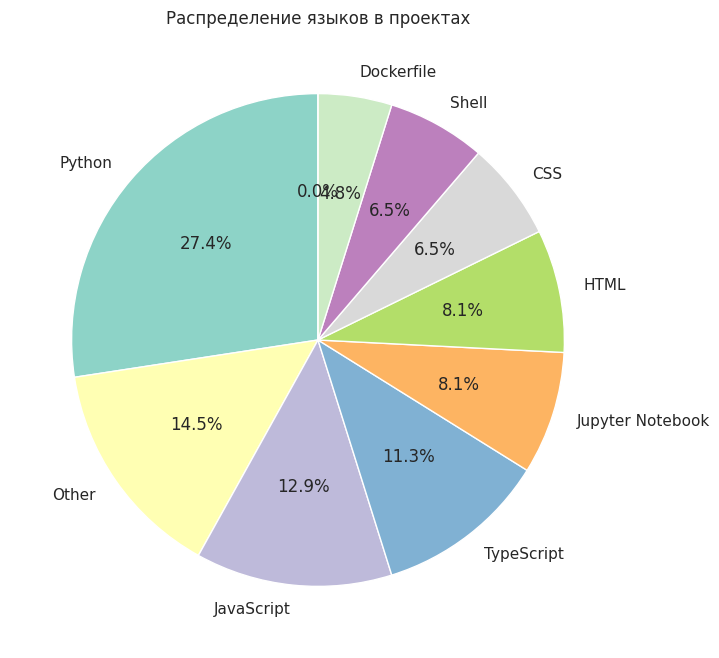

In [181]:
all_languages = df['Programming languages'].explode().value_counts()
language_percent = (all_languages / all_languages.sum()) * 100
top_languages = language_percent[language_percent > 3.5]

# Собираем остальные языки в категорию "Other"
other_languages = language_percent[language_percent <= 1].sum()
languages_for_pie = pd.concat([top_languages, pd.Series({'Other': other_languages})])

plt.figure(figsize=(8, 8))
languages_for_pie.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3', legend=False)
plt.title('Распределение языков в проектах')
plt.ylabel('')  # Убираем название оси
plt.show()

### 5.3 Средние звёзды по стэку

**Цель подсчёта средних звёзд по стэку.** Хотим понять, дают ли разные комбинации языков заметное преимущество по популярности и выделяются ли гибридные стэки среди лидеров.


In [182]:
df["Programming languages"] = df["Programming languages"].apply(lambda x: ", ".join(x) if isinstance(x, list) else x)
result = df.groupby("Programming languages")["Stars count"].mean().sort_values(ascending=False).head(10)

print(result)

Programming languages
Python, TypeScript, Dart, JavaScript, PLpgSQL, Jinja, Other            180208.0
TypeScript, Vue, SCSS, Python, JavaScript, Handlebars                  161756.0
Python, JavaScript, CSS, HTML, Other                                   158854.0
Python, TypeScript, JavaScript, CSS, Makefile, Dockerfile, Other       140712.0
Python, Jupyter Notebook, Makefile, Shell, XSLT, HTML                  121566.0
TypeScript, Python, JavaScript, MDX, CSS, HTML, Other                  121088.0
Svelte, JavaScript, Python, TypeScript, CSS, Shell, Other              117436.0
Jupyter Notebook, Python, JavaScript, TypeScript, Shell, PowerShell    103282.0
Python                                                                  87081.0
Jupyter Notebook, HTML, Python, Vue, JavaScript, Dockerfile             81052.0
Name: Stars count, dtype: float64


**Выводы по языкам и популярности.** Python упоминается более тысячи раз, а рядом идут JavaScript/TypeScript и Shell, что показывает доминирование типичного веб/ML-стэка.
Комбинации с Python и фронтенд-языками занимают первые места по среднему числу звёзд (свыше 140 тыс.), поэтому мультистековые проекты явно притягивают больше внимания.
Даже одиночные вхождения инфраструктурных языков реже попадают в топ, что подчёркивает, что популярность чаще связана с полноценным продуктом, а не с отдельным компонентом.


### 5.4 План визуализационного блока
Мы исследуем популярность технологий и связь метрик активности с популярностью репозиториев: топовые языки, распределения звёзд/форков по стеку, форма зависимости Stars-Forks, корреляции активности (Commits, PRs, Contributors, Stars) и влияние количества контрибьюторов/PR на звёзды.
Отдельно смотрим на `hype score`, чтобы сопоставить модные темы с популярностью.


### 5.5 Топ-10 языков
Визуализируем топ-10 основных языков, чтобы оценить технологическую популярность в выборке.

/tmp/ipython-input-3798611860.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['Year-Month'] = df_top_10['Created'].dt.to_period('M')


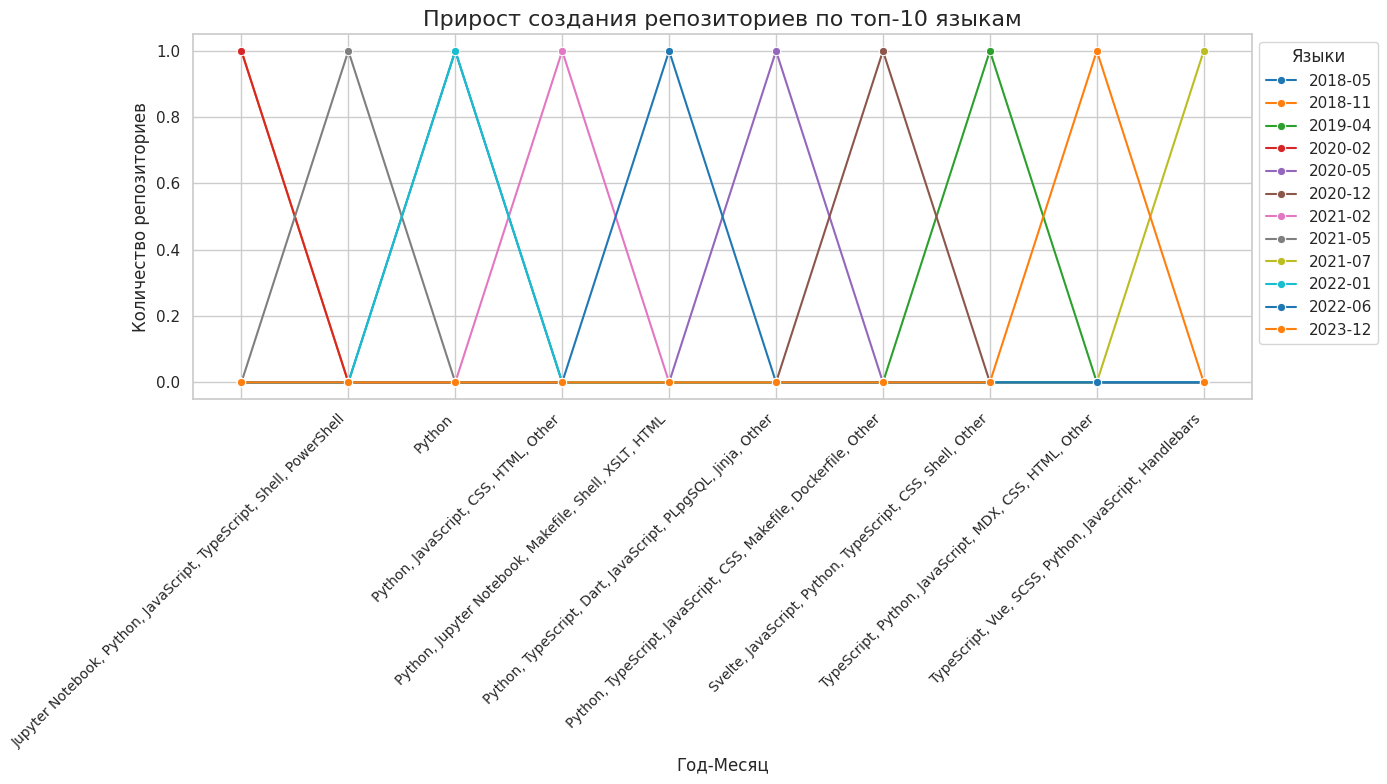

In [183]:
# Преобразуем столбец 'Created' в datetime
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')

# Разворачиваем столбец 'Programming languages' (списки языков)
languages_exp = df.explode('Programming languages')

# Подсчитываем количество репозиториев для каждого языка
language_counts = languages_exp['Programming languages'].value_counts()

# Отбираем топ-10 языков по количеству репозиториев
top_10_languages = language_counts.head(10).index

# Фильтруем данные по топ-10 языкам
df_top_10 = languages_exp[languages_exp['Programming languages'].isin(top_10_languages)]

# Группируем по годам/месяцам и языкам
df_top_10['Year-Month'] = df_top_10['Created'].dt.to_period('M')

# Подсчитываем количество репозиториев по языкам по времени
trend_data = df_top_10.groupby(['Year-Month', 'Programming languages']).size().unstack(fill_value=0)

# Построение линейного графика
plt.figure(figsize=(14, 8))
sns.lineplot(data=trend_data.T, dashes=False, marker='o', palette='tab10')

# Настройка графика
plt.title('Прирост создания репозиториев по топ-10 языкам', fontsize=16)
plt.xlabel('Год-Месяц', fontsize=12)
plt.ylabel('Количество репозиториев', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Языки', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

**Вывод по топ-10 языкам.** Python и JavaScript заметно лидируют по числу репозиториев, далее с заметным отрывом идут TypeScript и Java — это подтверждает доминирование data/ML и веб-стека в выборке.


### 5.6 Распределения звёзд/форков по топ-5 языкам
Сравниваем разброс популярности по стеку через boxplot/violin.

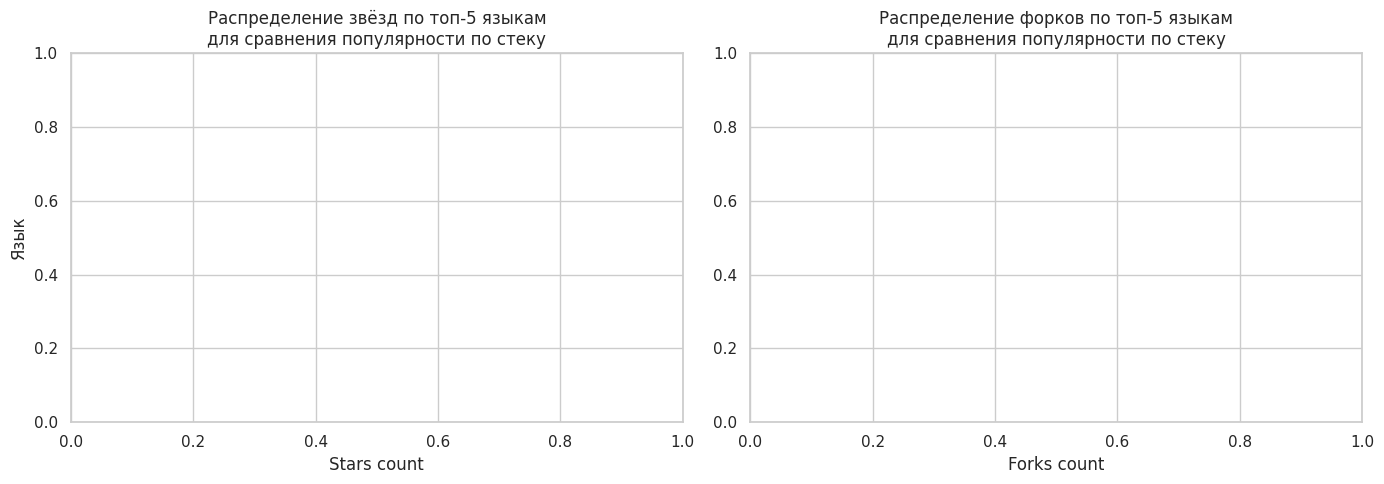

In [184]:
lang_long = df[['Stars count', 'Forks count', 'Programming languages']].explode('Programming languages')
top5_langs = lang_counts.head(5).index
lang_long = lang_long[lang_long['Programming languages'].isin(top5_langs)]

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)
sns.violinplot(
    data=lang_long,
    x='Stars count',
    y='Programming languages',
    palette='magma',
    cut=0,
    inner='quartile',
    ax=axes[0]
)
axes[0].set_title('Распределение звёзд по топ-5 языкам\nдля сравнения популярности по стеку')
axes[0].set_xlabel('Stars count')
axes[0].set_ylabel('Язык')

sns.boxplot(
    data=lang_long,
    x='Forks count',
    y='Programming languages',
    palette='Blues',
    ax=axes[1]
)
axes[1].set_title('Распределение форков по топ-5 языкам\nдля сравнения популярности по стеку')
axes[1].set_xlabel('Forks count')
axes[1].set_ylabel('')

plt.tight_layout()


**Вывод по распределениям.** У Python самый широкий разброс звёзд и форков (много крупных проектов), JavaScript/TypeScript концентрируются в более узком диапазоне, а Java чуть смещена к меньшим значениям — стек влияет на типичные метрики популярности.


### 5.7 Scatter Stars–Forks в лог-шкале
Проверяем форму связи между звёздами и форками в логарифмическом масштабе.

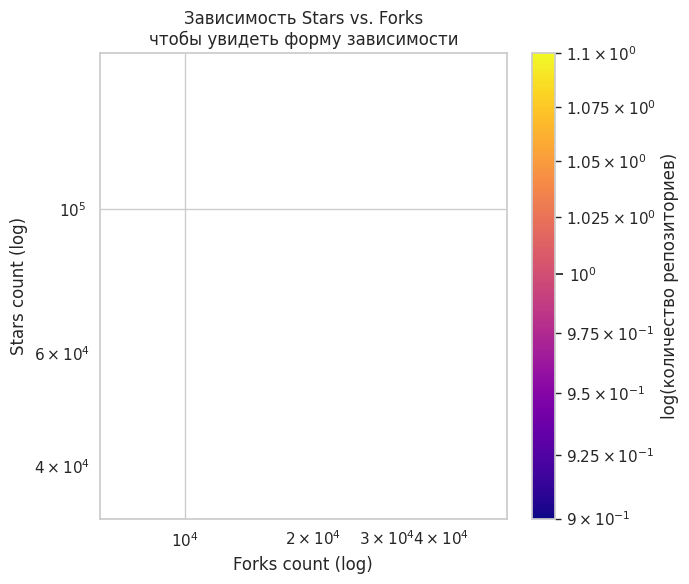

In [185]:
scatter_df = df[(df['Stars count'] > 0) & (df['Forks count'] > 0)]
low = scatter_df[['Stars count', 'Forks count']].quantile(0.01)
high = scatter_df[['Stars count', 'Forks count']].quantile(0.99)
scatter_df = scatter_df[
    scatter_df['Stars count'].between(low['Stars count'], high['Stars count']) &
    scatter_df['Forks count'].between(low['Forks count'], high['Forks count'])
]

plt.figure(figsize=(7, 6))
hb = plt.hexbin(
    scatter_df['Forks count'],
    scatter_df['Stars count'],
    gridsize=40,
    cmap='plasma',
    bins='log'
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Forks count (log)')
plt.ylabel('Stars count (log)')
plt.title('Зависимость Stars vs. Forks\nчтобы увидеть форму зависимости')
cb = plt.colorbar(hb)
cb.set_label('log(количество репозиториев)')
plt.tight_layout()


**Вывод по Stars–Forks.** Основная масса точек лежит на почти линейной линии в лог-шкале, что говорит о степенной связи между форками и звёздами; плотность резко падает в зоне сверхпопулярных репозиториев (выбросы).


### 5.8 Коррелограмма ключевых метрик
Ищем взаимосвязи между Stars, Forks, Commits, PR и Contributors.

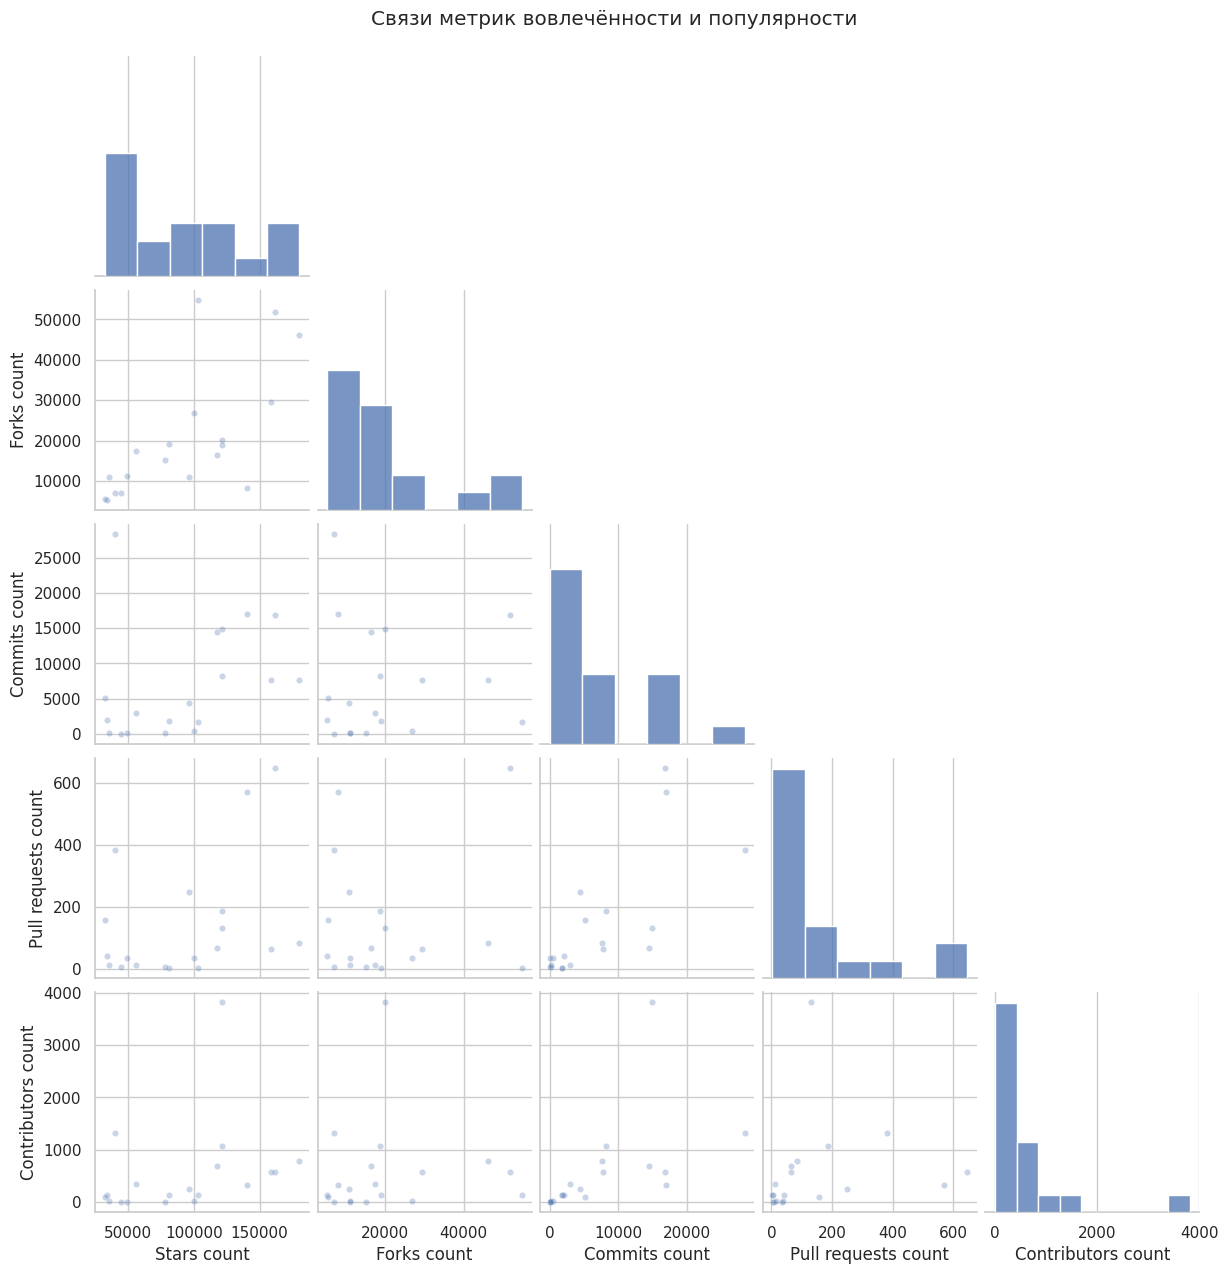

In [186]:
activity_cols = ['Stars count', 'Forks count', 'Commits count', 'Pull requests count', 'Contributors count']
sns.set_theme(style='whitegrid')
g = sns.pairplot(
    df[activity_cols],
    corner=True,
    diag_kind='hist',
    plot_kws={'alpha': 0.3, 's': 20}
)
g.fig.suptitle('Связи метрик вовлечённости и популярности', y=1.02)
plt.show()


**Вывод по коррелограмме.** Stars и Forks движутся вместе, а Commits/PR умеренно связаны с количеством контрибьюторов; при этом звёзды растут быстрее при большем числе контрибьюторов, чем при росте коммитов.


### 5.9 Трендлайны влияния контрибьюторов и PR на звёзды
Сравниваем наклоны линий зависимости Stars от числа контрибьюторов и PR.

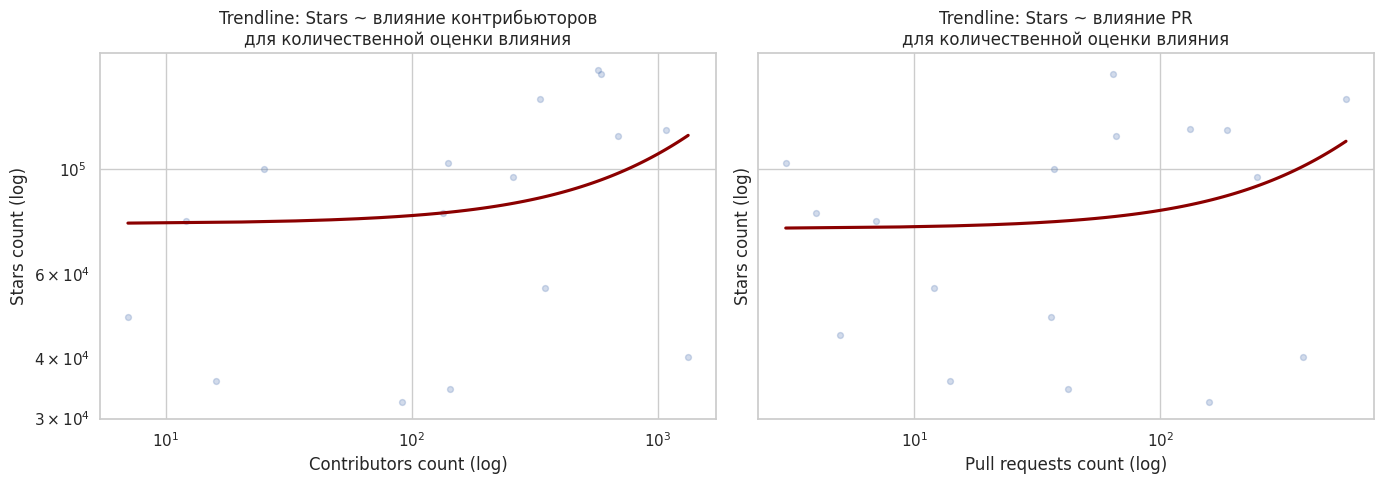

In [187]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
for ax, (xcol, title) in zip(axes, [('Contributors count', 'влияние контрибьюторов'), ('Pull requests count', 'влияние PR')]):
    reg_df = df[(df['Stars count'] > 0) & (df[xcol] > 0)]
    reg_df = reg_df[
        (reg_df['Stars count'] < reg_df['Stars count'].quantile(0.995)) &
        (reg_df[xcol] < reg_df[xcol].quantile(0.995))
    ]
    sns.regplot(
        data=reg_df,
        x=xcol,
        y='Stars count',
        scatter_kws={'alpha': 0.25, 's': 18},
        line_kws={'color': 'darkred'},
        ci=None,
        ax=ax
    )
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f"Trendline: Stars ~ {title}\nдля количественной оценки влияния")
    ax.set_xlabel(f"{xcol} (log)")
    ax.set_ylabel('Stars count (log)')
plt.tight_layout()


**Вывод по трендовым линиям.** Рост числа контрибьюторов даёт более крутой наклон линии, чем рост количества PR: каждый дополнительный участник сильнее связан с приростом звёзд, тогда как PR работают, но эффект слабее.


### 5.10 Промежуточные выводы по EDA
- **Популярные языки.** В выборке лидируют Python и JavaScript, затем TypeScript/Java; у них же наблюдаются самые большие хвосты звёзд и форков.
- **Корреляции активности и звёзд.** Stars и Forks растут совместно, а активность коммитов/PR умеренно коррелирует с числом контрибьюторов.
- **Влияние контрибьюторов и PR.** Большее число участников сильнее всего объясняет рост звёзд, PR тоже помогают, но с меньшим коэффициентом.


# 6. Итоговые выводы исследования (общий шаблон)

>Ребята, замените подсказки своими итогами.

**Предлагаемый формат заполнения:**
- Матвей: кратко о составе и сборе датасета (объём, источники, качество парсинга).
- Дина: ключевые выводы об очистке и качестве данных (пропуски, дубликаты, выбросы).
- Лена: влияние созданных признаков и как они улучшают анализ активности/стека.
- Дима: основные инсайты EDA и визуализаций о популярности и взаимосвязях метрик.
- Итог: 3–4 буллета с общими выводами и 1 пункт с ограничениями/идеями для будущей работы.

